In [ ]:
## Step 1: Load and Merge the Datasets

In [20]:
import pandas as pd

# Load revenue data 1
revenue_df = pd.read_csv("Revenue_Data_1.csv")

# Load marketing data
marketing_df = pd.read_csv("Marketing_Data_1.csv")

# Load visitors data 
visitors_df = pd.read_csv("Visitors_Data_1.csv")

# Merge datasets on 'Date'
merged_df = pd.merge(revenue_df, marketing_df, on="Date", how="left")
merged_df = pd.merge(merged_df, visitors_df, on="Date", how="left")

# Save merged data to a new CSV file
merged_df.to_csv("merged_data.csv", index=False)

print (merged_df)

           Date  Week_ID  Month Number  Month_ID    Year   Day_Name  Revenue  \
0    09/11/2020     34.0          11.0      11.0  2020.0     Monday    465.0   
1    10/11/2020     34.0          11.0      11.0  2020.0    Tuesday  10386.0   
2    11/11/2020     34.0          11.0      11.0  2020.0  Wednesday  12475.0   
3    12/11/2020     34.0          11.0      11.0  2020.0   Thursday  11712.0   
4    13/11/2020     34.0          11.0      11.0  2020.0     Friday  10000.0   
..          ...      ...           ...       ...     ...        ...      ...   
180  08/05/2021     60.0           5.0      17.0  2021.0   Saturday   5927.0   
181  09/05/2021     61.0           5.0      17.0  2021.0     Sunday   3861.0   
182  10/05/2021      NaN           NaN       NaN     NaN        NaN      NaN   
183  11/05/2021      NaN           NaN       NaN     NaN        NaN      NaN   
184  12/05/2021      NaN           NaN       NaN     NaN        NaN      NaN   

     Marketing Spend           Promo  V

In [ ]:
## Step 2: Data Pre-processing and Cleaning


In [10]:
# Check for missing values
print(merged_df.isnull().sum())

Date               0
Week_ID            3
Month Number       3
Month_ID           3
Year               3
Day_Name           3
Revenue            7
Marketing Spend    7
Promo              3
Visitors           8
dtype: int64


In [11]:
# Drop rows with missing values in specific columns
merged_df.dropna(subset=['Week_ID', 'Month Number', 'Month_ID', 'Year', 'Day_Name'], inplace=True)

# Replace missing values in numeric columns with the mean
merged_df['Revenue'].fillna(merged_df['Revenue'].mean(), inplace=True)
merged_df['Marketing Spend'].fillna(merged_df['Marketing Spend'].mean(), inplace=True)
merged_df['Visitors'].fillna(merged_df['Visitors'].mean(), inplace=True)

# Replace missing values in categorical column with mode
merged_df['Promo'].fillna(merged_df['Promo'].mode()[0], inplace=True)

# Verify if missing values have been handled
print(merged_df.isnull().sum())

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Marketing Spend    0
Promo              0
Visitors           0
dtype: int64


In [ ]:
## We first inspect the number of missing values in each column.
## Then, we drop rows with missing values in specific columns using dropna().
## Next, we fill missing values in numeric columns with their respective means using fillna().
## For the 'Promo' column, we fill missing values with the mode (most frequent value) using fillna().

In [ ]:
# Step 3: Total Revenue by Campaign

In [12]:
total_revenue_by_campaign = merged_df.groupby('Promo')['Revenue'].sum()
print("Total Revenue by Campaign:")
print(total_revenue_by_campaign)

Total Revenue by Campaign:
Promo
No Promo          443039.134831
Promotion Blue    876514.269663
Promotion Red     586193.134831
Name: Revenue, dtype: float64


In [16]:
# Step 4: Day with the Highest Average Visitors

In [14]:
highest_avg_visitors_day = merged_df.groupby('Day_Name')['Visitors'].mean().idxmax()
print("Day with the Highest Average Visitors:", highest_avg_visitors_day)

Day with the Highest Average Visitors: Thursday


In [ ]:
# Step 5: Promotion Cost Analysis

In [15]:
promotion_cost = merged_df.groupby('Promo')['Marketing Spend'].sum()
print("Promotion Costs:")
print(promotion_cost)

Promotion Costs:
Promo
No Promo          87018.699908
Promotion Blue    99321.041321
Promotion Red     67685.730877
Name: Marketing Spend, dtype: float64


In [ ]:
# Step 6: Weekly Average Revenue, Visitors, and Marketing Spend

In [17]:
weekly_avg_data = merged_df.groupby('Week_ID').agg({'Revenue':'mean', 'Visitors':'mean', 'Marketing Spend':'mean'})
print("Weekly Average Revenue, Visitors, and Marketing Spend:")
print(weekly_avg_data)

Weekly Average Revenue, Visitors, and Marketing Spend:
              Revenue     Visitors  Marketing Spend
Week_ID                                            
34.0      9672.333333  1476.333333      1561.541667
35.0      9122.714286  1609.230831      1206.700288
36.0     11997.590690  1718.571429      1898.465102
37.0      9601.428571  1639.659403      1387.435714
38.0     10176.162119  1816.285714      1341.104870
39.0     10397.571429  1652.714286      1365.054929
40.0     16437.142857  1808.802260      1934.466270
41.0     10842.400000  1669.800000      1489.445859
42.0     15245.000000  1531.000000      1477.444444
43.0      9303.857143  2005.714286      1721.481530
44.0     11265.857143  1747.285714      1433.019697
45.0      9171.428571  1768.000000      1242.806782
46.0      7659.000000  1314.373688      1067.448413
47.0     11946.428571  1739.142857      1342.318146
48.0      9061.857143  1421.142857      1110.615224
49.0      8045.142857  1501.714286      1188.639033
50.0     

In [18]:
# Step 7: Plot Revenue and Cost by Week

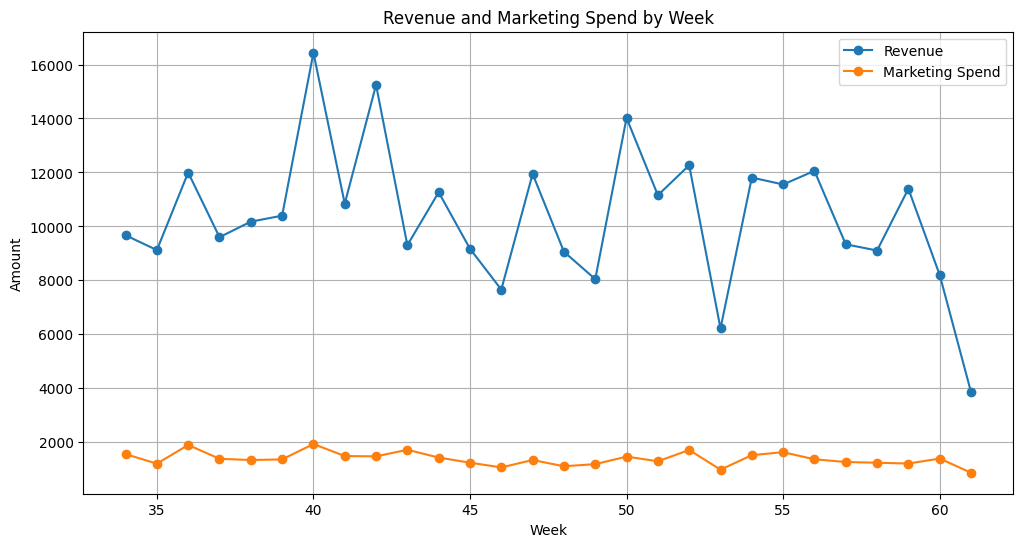

In [19]:
import matplotlib.pyplot as plt

# Plot Revenue and Cost by Week
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg_data.index, weekly_avg_data['Revenue'], marker='o', label='Revenue')
plt.plot(weekly_avg_data.index, weekly_avg_data['Marketing Spend'], marker='o', label='Marketing Spend')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.title('Revenue and Marketing Spend by Week')
plt.legend()
plt.grid(True)
plt.show()